# Problem 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')

In [3]:
# Extract explonatory variables and objective variable
X = data[['GrLivArea','YearBuilt']]
y = data['SalePrice']

In [4]:
print(X.head())

   GrLivArea  YearBuilt
0       1710       2003
1       1262       1976
2       1786       2001
3       1717       1915
4       2198       2000


In [5]:
print(y.head())

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


# Problem 2

In [6]:
# Check for null-values in exploratory variable
X.value_counts().isnull().sum()

0

In [7]:
y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [8]:
X.describe()

,GrLivArea,YearBuilt
count,1460.000000,1460.000000
mean,1515.463699,1971.267808
std,525.480383,30.202904
min,334.000000,1872.000000
25%,1129.500000,1954.000000
50%,1464.000000,1973.000000
75%,1776.750000,2000.000000
max,5642.000000,2010.000000


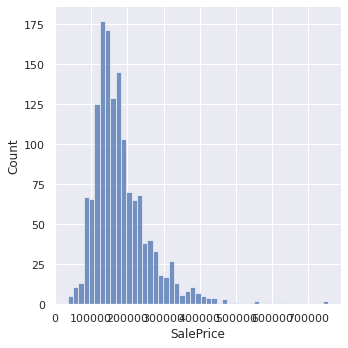

In [9]:
# check distribution of SalePrice - the objective variable
sns.set_theme()
sns.displot(y)

Text(0, 0.5, 'SalePrice')

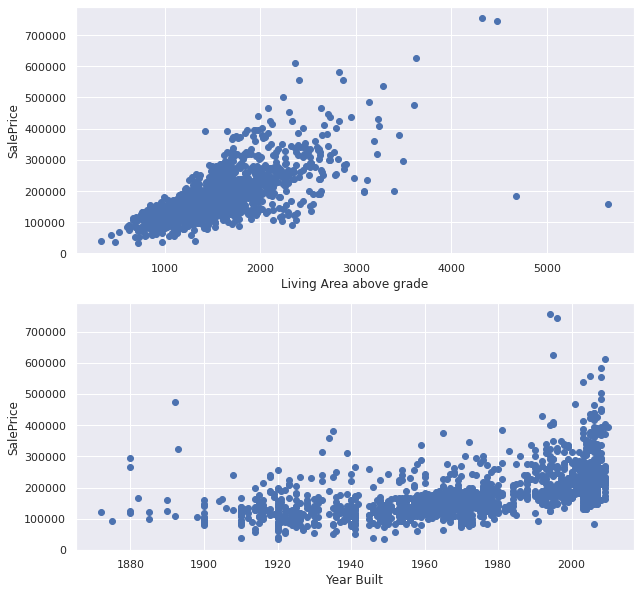

In [10]:
fig, (ax1,ax2) = plt.subplots(nrows=2,figsize=(10,10))
ax1.scatter(x=X['GrLivArea'],y=y)
ax1.set_xlabel('Living Area above grade')
ax1.set_ylabel('SalePrice')
ax2.scatter(x=X['YearBuilt'],y=y)
ax2.set_xlabel('Year Built')
ax2.set_ylabel('SalePrice')

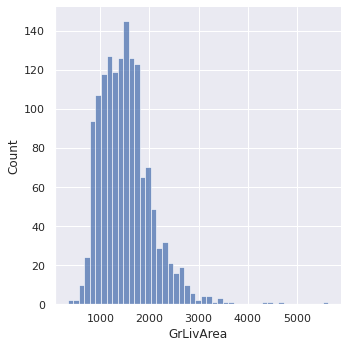

In [11]:
# Distribution of 'GrLivArea' feature
sns.displot(X['GrLivArea'])

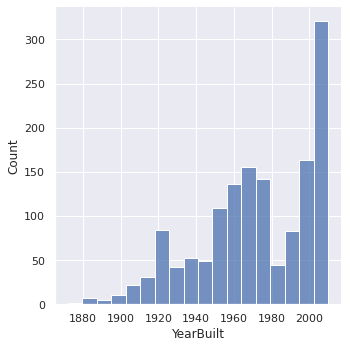

In [12]:
# Distribution of 'YearBuilt' feature
sns.displot(X['YearBuilt'])

As the distribution of both objective variable 'SalePrice' and exploratory variable 'GrLiveArea' are not normally distributed, Log transformation can be done for both of the set of their values. Linear regression requires normally distributed data so it may enhance the performance of the model. 

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Apply log transformation
X['GrLivArea'] = X['GrLivArea'].apply(np.log)
y = y.apply(np.log)

# Splitting the data for training and testing
# 75% of the dataset are used for training, the remaining is used for testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

<ipython-input-13-46f15f5102b1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['GrLivArea'] = X['GrLivArea'].apply(np.log)


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression().fit(x_train,y_train)

y_pred = np.exp(model.predict(x_test)) # Inverse the value for correctness
y_true = np.exp(y_test)
print('Mean square error of the model: {}'.format(mean_squared_error(y_true,y_pred)))

Mean square error of the model: 1715877900.0352993


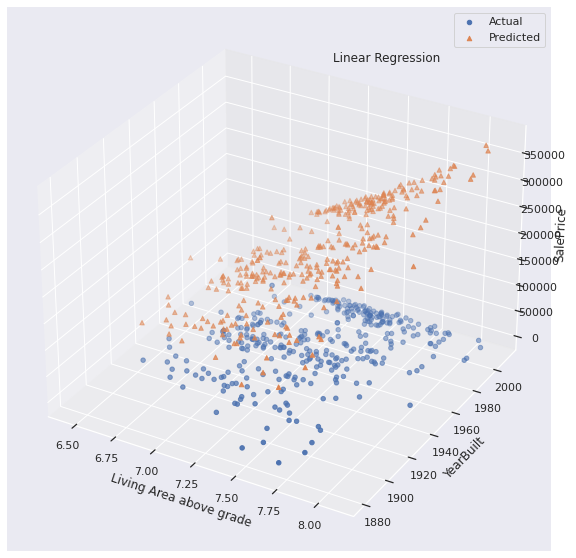

In [15]:
# Visualization
from mpl_toolkits import mplot3d

def visualize(x_test,y_test,y_pred, method):
    fig = plt.figure(figsize = (20, 10))
    ax = plt.axes(projection ="3d")

    ax.scatter3D(x_test['GrLivArea'],x_test['YearBuilt'],y_test,marker='o',label='Actual')
    ax.scatter3D(x_test['GrLivArea'],x_test['YearBuilt'],y_pred,marker='^',label='Predicted')

    ax.set_xlabel('Living Area above grade')
    ax.set_ylabel('YearBuilt')
    ax.set_zlabel('SalePrice')
    
    ax.text2D(0.6, 0.9, method, transform=ax.transAxes)
    plt.legend()
    plt.show()
    
visualize(x_test,y_test,y_pred,'Linear Regression')

# Problem 3

In [16]:
def calculateScore(model, x_train, y_train, x_test, y_test):
    # Training the model
    model.fit(x_train,y_train)
    # Predict the model
    y_pred = np.exp(model.predict(x_test)) # Inverse the value for correctness
    y_true = np.exp(y_test)
    return y_pred, mean_squared_error(y_true,y_pred)

In [17]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [18]:
pred_list, mse_list = zip(*[
    calculateScore(LinearRegression(), x_train, y_train, x_test, y_test),
    calculateScore(SVR(), x_train, y_train, x_test, y_test),
    calculateScore(DecisionTreeRegressor(), x_train, y_train, x_test, y_test),
    calculateScore(RandomForestRegressor(), x_train, y_train, x_test, y_test)
])

MSE_list = pd.DataFrame(columns=['MSE'], data = mse_list , index=['Linear Regression','SVR','DecisionTreeRegressor','RandomForestRegressor'])

In [19]:
MSE_list

,MSE
Linear Regression,1.715878e+09
SVR,4.409246e+09
DecisionTreeRegressor,2.413052e+09
RandomForestRegressor,1.337475e+09


Visualization of each method

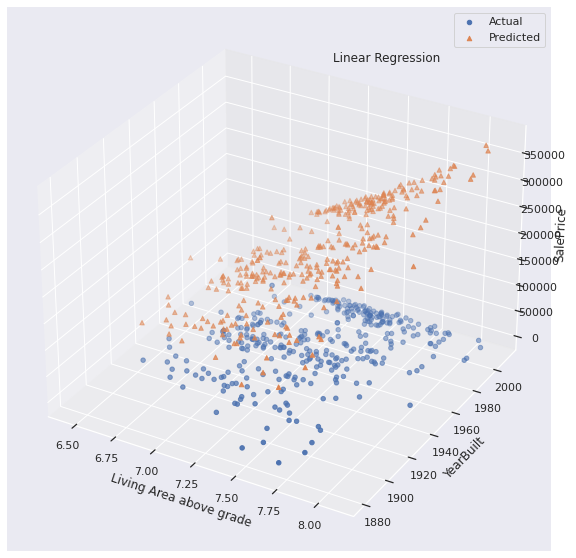

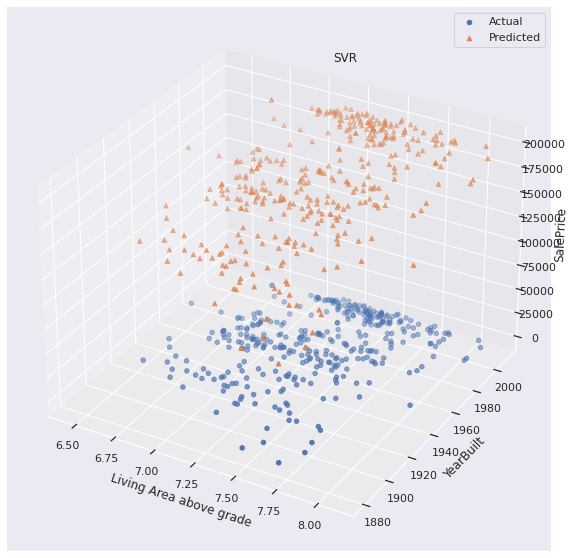

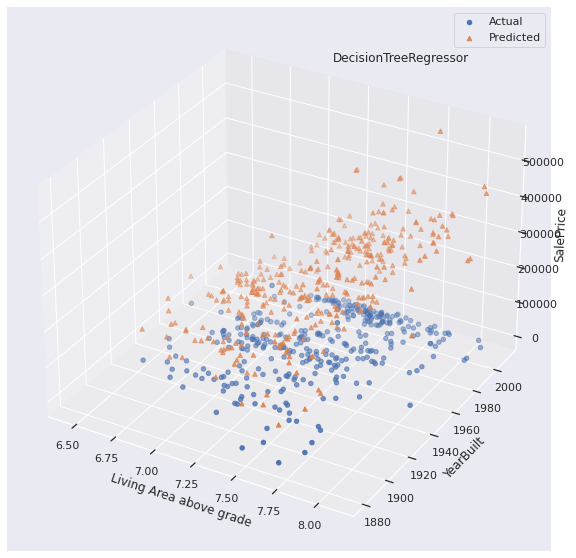

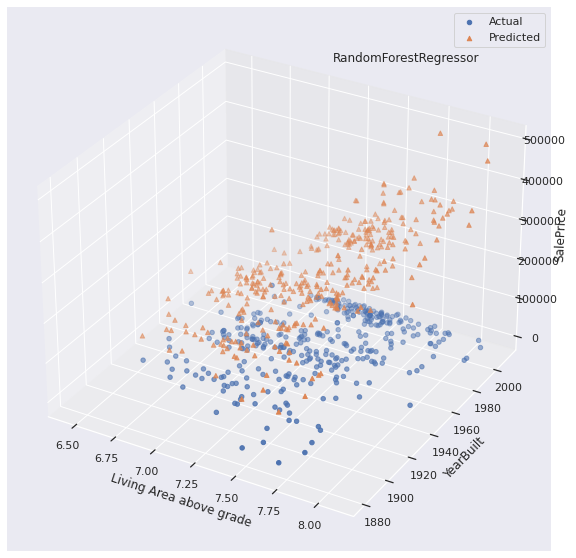

In [20]:
for i in range(len(pred_list)):
    visualize(x_test,y_test,pred_list[i],MSE_list.index[i])

After calculating the mean square error of all five methods, we can see that Random Forest Regressor is the one which gets the lowest value of this figure. In other words, this method perform most efficiently compared to others though MSE is still very high. By contrast, SVR gets the highest MSE meaning the worst perfomance amoong all. 

# Problem 4

I will try to add one more feature to the all the regression model and try to see how each of them will perform. The feature chosen is the one which has the highest correlation with the target variable.

In [21]:
# Generate the correslation matrix
cor = data.corr()
# Get the feature name
res = cor['SalePrice'].sort_values(key=abs,ascending=False)
added_feature = res.index[1]
print(added_feature)

OverallQual


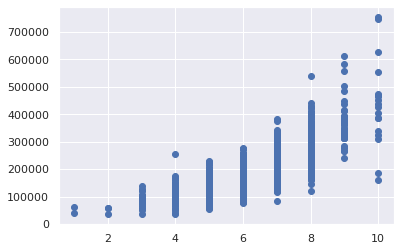

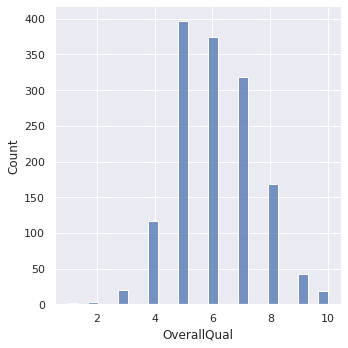

In [22]:
# Visualization of the added feature distribution
plt.scatter(x=data[added_feature],y=np.exp(y))
sns.displot(data[added_feature])

In [29]:
# Train all the models with the added feature
X_new = pd.concat([X,data[added_feature]],axis=1)
X_new

,GrLivArea,YearBuilt,OverallQual
0,7.444249,2003,7
1,7.140453,1976,6
2,7.487734,2001,7
3,7.448334,1915,7
4,7.695303,2000,8
...,...,...,...
1455,7.406711,1999,6
1456,7.636752,1978,6
1457,7.757906,1941,7
1458,6.982863,1950,5


In [30]:
# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25)

In [31]:
# Build regressors and evaluate
pred_list_new, mse_list_new = zip(*[
    calculateScore(LinearRegression(), x_train, y_train, x_test, y_test),
    calculateScore(SVR(), x_train, y_train, x_test, y_test),
    calculateScore(DecisionTreeRegressor(), x_train, y_train, x_test, y_test),
    calculateScore(RandomForestRegressor(), x_train, y_train, x_test, y_test)
])

MSE_list_new = pd.DataFrame(columns=['MSE'], data = mse_list_new , index=['Linear Regression','SVR','DecisionTreeRegressor','RandomForestRegressor'])

In [32]:
MSE_list_new

,MSE
Linear Regression,9.233900e+08
SVR,4.055970e+09
DecisionTreeRegressor,1.670091e+09
RandomForestRegressor,9.015321e+08


By adding the new feature to the model, we can see a considerable drop in all the MSE of four methods. It means the performance of all the model can be increased by adding this feature. 